## TODO - Atualizar com as dogeCoin
<h3>Resumo do que foi feito:</h3>

<h4>Bitcon:</h4>

Foi usada a base do link: https://www.kaggle.com/mczielinski/bitcoin-historical-data?select=bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv com a base para os bitcoin. Ela aparenta ter a contação de todas as operações feitas de 2012 a 2021, mas basicamente é pego minuto a minuto. 

Para tratar a base foram apagados linhas que tinham todos os valores de Open	High	Low	Close	Volume_(BTC)	Volume_(Currency)	Weighted_Price nulos e foi transformado a coluna de tempo de timestamp para datatime. Com a datas no formato datatime foi retirado o time e deixei apenas o ano, dia e mês.

A base foi modificada para pegar o valor diario da contação. O maior e menor valor no dia pra usar como a variação máximo do ativo no dia. 

<h4>Elon Musk tweets:</h4>

foi utilizada a base do link: https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021. Ela contém (teoricamente) todos os tweets do Elon Musk de 2010 à 2021.

As datas foram modificadsa para deixar apenas o ano, dia e mês. Foi retirado as colunas que não tinha interesse e ficando apenas as colunas 'nretweets','nlikes','date','tweet' e 'nreplies'.

Foi criada uma base com os tweets que tinham refências as seguintes palavras:  bitcoin, bitcoins, Bitcoins, Bitcoin crypto, cryptocurrency, Crypto, Cryptocurrency.




In [24]:
#imports 
#Tirando os warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import math
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from scipy.stats import zscore
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import balanced_accuracy_score

In [56]:

# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
         return  "Negative"
 
    else :
         return "Neutral"
 

<h1> Base do historico dos preço do bitcoin</h1>

In [203]:
#Caminho para o data set
# https://www.kaggle.com/mczielinski/bitcoin-historical-data?select=bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv
df = pd.read_csv('C:/Banjos/DataSets/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [204]:
#Verificando casos vazios por coluna/atributo
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [205]:
#descartando os dados vazios
df = df.dropna(how="all",subset=df.columns[1:])
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [206]:
#tranformando o timestamp em datatime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [207]:
#Avaliando só em um mês

#data inicial
dataIni='2018-1-1'
#data final
dataFim='2021-4-1'


In [209]:
#criando um dataset com os dados do intervalo das datas
df = df.loc[(df['Timestamp'] >=dataIni)& (df['Timestamp'] <=dataFim) ] 
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3150976,2018-01-01 00:00:00,13880.00,13906.37,13841.00,13841.01,4.967997,69030.718890,13895.081610
3150977,2018-01-01 00:01:00,13841.01,13890.43,13841.01,13890.43,1.665850,23064.082359,13845.237237
3150978,2018-01-01 00:02:00,13846.64,13890.35,13846.64,13847.51,0.269346,3739.690844,13884.349123
3150979,2018-01-01 00:03:00,13847.51,13874.92,13823.19,13823.19,1.155274,15986.279494,13837.650132
3150980,2018-01-01 00:04:00,13823.19,13826.75,13803.20,13803.20,0.646691,8930.465767,13809.482390
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [210]:

df = df.rename(columns={"Timestamp": "date"})
#retirando o time da data.
df["date"]  = pd.to_datetime(df['date']).dt.date

close =[]
openn = []
date =[]
for i in df['date'].unique():
    close.append(df.loc[df['date']==i]['Close'].max())
    openn.append(df.loc[df['date']==i]['Open'].min())
    date.append(i)

data = {'date':date,
        'Open':openn,
       'Close':close}

dfResumido = pd.DataFrame(data)
dfResumido

,date,Open,Close
0,2018-01-01,12840.00,13941.49
1,2018-01-02,12939.99,15253.00
2,2018-01-03,14549.00,15437.65
3,2018-01-04,14192.37,15394.96
4,2018-01-05,14811.00,17090.03
...,...,...,...
1181,2021-03-27,53995.00,56591.90
1182,2021-03-28,54679.73,56545.59
1183,2021-03-29,54919.82,58309.35
1184,2021-03-30,57019.89,59371.86


#### dfResumido contém os dados de abertura e fechamento da bitcoin no intervalo determinado.

<h1>Base de tweets do Elon musk</h1>

In [211]:

#leitura da base 
# https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021
dfElos = pd.read_csv('C:/Banjos/DataSets/2021.csv')
#tirando a hora das datas e deixando so o ano, mês e dia
dfElos["date"] = dfElos['date'] = pd.to_datetime(dfElos['date']).dt.date
dfElos

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1373819373090050048,1373669212271566858,1.616379e+12,2021-03-22,0,NaN,@bluemoondance74 @NASASpaceflight Going well. ...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'bluemoondance74', 'name': 'R...",NaN,NaN,NaN,NaN
1,1,1373735946244431873,1373669212271566858,1.616359e+12,2021-03-21,0,NaN,@NASASpaceflight Hopefully will happen this de...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'NASASpaceflight', 'name': 'C...",NaN,NaN,NaN,NaN
2,2,1373555480870621188,1373328330041229312,1.616316e+12,2021-03-21,0,NaN,@newscientist True,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'newscientist', 'name': 'New ...",NaN,NaN,NaN,NaN
3,3,1373507545315172357,1373263440391864323,1.616305e+12,2021-03-21,0,NaN,@cleantechnica I am accumulating resources to ...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'cleantechnica', 'name': 'Cle...",NaN,NaN,NaN,NaN
4,4,1373492611231535111,1373357995288051718,1.616301e+12,2021-03-21,0,NaN,@CathieDWood When vast amounts of manufacturin...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CathieDWood', 'name': 'Cathi...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12334,12334,142881284019060736,142881284019060736,1.322901e+12,2011-12-03,0,NaN,That was a total non sequitur btw,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
12335,12335,142880871391838208,142880871391838208,1.322900e+12,2011-12-03,0,NaN,"Great Voltaire quote, arguably better than Twa...",en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
12336,12336,142188458125963264,142188458125963264,1.322735e+12,2011-12-01,0,NaN,I made the volume on the Model S http://t.co/...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
12337,12337,142179928203460608,142179928203460608,1.322733e+12,2011-12-01,0,NaN,Went to Iceland on Sat to ride bumper cars on ...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [212]:
#Colunas/atributo
dfElos.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [213]:
dfElos = dfElos.dropna(how="all",axis =1)
dfElos

,Unnamed: 0,id,conversation_id,created_at,date,timezone,tweet,language,hashtags,cashtags,...,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,reply_to
0,0,1373819373090050048,1373669212271566858,1.616379e+12,2021-03-22,0,@bluemoondance74 @NASASpaceflight Going well. ...,en,[],[],...,[],0,NaN,False,2678,234,134,NaN,None,"[{'screen_name': 'bluemoondance74', 'name': 'R..."
1,1,1373735946244431873,1373669212271566858,1.616359e+12,2021-03-21,0,@NASASpaceflight Hopefully will happen this de...,en,[],[],...,[],0,NaN,False,7967,535,570,NaN,None,"[{'screen_name': 'NASASpaceflight', 'name': 'C..."
2,2,1373555480870621188,1373328330041229312,1.616316e+12,2021-03-21,0,@newscientist True,en,[],[],...,[],0,NaN,False,15510,539,409,NaN,None,"[{'screen_name': 'newscientist', 'name': 'New ..."
3,3,1373507545315172357,1373263440391864323,1.616305e+12,2021-03-21,0,@cleantechnica I am accumulating resources to ...,en,[],[],...,[],0,NaN,False,143476,10500,12483,NaN,None,"[{'screen_name': 'cleantechnica', 'name': 'Cle..."
4,4,1373492611231535111,1373357995288051718,1.616301e+12,2021-03-21,0,@CathieDWood When vast amounts of manufacturin...,en,[],[],...,[],0,NaN,False,6568,376,425,NaN,None,"[{'screen_name': 'CathieDWood', 'name': 'Cathi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12334,12334,142881284019060736,142881284019060736,1.322901e+12,2011-12-03,0,That was a total non sequitur btw,en,[],[],...,[],0,NaN,False,53,31,6,NaN,None,[]
12335,12335,142880871391838208,142880871391838208,1.322900e+12,2011-12-03,0,"Great Voltaire quote, arguably better than Twa...",en,[],[],...,[],0,NaN,False,29,7,25,NaN,None,[]
12336,12336,142188458125963264,142188458125963264,1.322735e+12,2011-12-01,0,I made the volume on the Model S http://t.co/...,en,[],[],...,[],0,NaN,False,78,31,9,NaN,None,[]
12337,12337,142179928203460608,142179928203460608,1.322733e+12,2011-12-01,0,Went to Iceland on Sat to ride bumper cars on ...,en,[],[],...,['https://pbs.twimg.com/media/Afkf5DMCAAEJGFr....,1,https://pbs.twimg.com/media/Afkf5DMCAAEJGFr.jpg,False,189,32,15,NaN,None,[]


In [214]:

#colunas desejadas
quero = ['nretweets','nlikes','date','tweet','nreplies']
#apagando colunas que não queremos
for i in dfElos.columns:
    
    if not(i in quero):
        del dfElos[i]


dfElos

,date,tweet,nlikes,nreplies,nretweets
0,2021-03-22,@bluemoondance74 @NASASpaceflight Going well. ...,2678,234,134
1,2021-03-21,@NASASpaceflight Hopefully will happen this de...,7967,535,570
2,2021-03-21,@newscientist True,15510,539,409
3,2021-03-21,@cleantechnica I am accumulating resources to ...,143476,10500,12483
4,2021-03-21,@CathieDWood When vast amounts of manufacturin...,6568,376,425
...,...,...,...,...,...
12334,2011-12-03,That was a total non sequitur btw,53,31,6
12335,2011-12-03,"Great Voltaire quote, arguably better than Twa...",29,7,25
12336,2011-12-01,I made the volume on the Model S http://t.co/...,78,31,9
12337,2011-12-01,Went to Iceland on Sat to ride bumper cars on ...,189,32,15


In [236]:
#linhas em que são citados o bitcoins
dfBit = dfElos[dfElos["tweet"].str.contains("bitcoin|bitcoins|Bitcoins|Bitcoin|crypto|cryptocurrency|Crypto|Cryptocurrency" , na=False)]
dfBit

,date,tweet,nlikes,nreplies,nretweets
68,2021-03-12,BTC (Bitcoin) is an anagram of TBC(The Boring ...,244893,12079,17945
148,2021-03-02,Scammers &amp; crypto should get a room,200272,9585,17037
217,2021-02-20,Cryptocurrency explained https://t.co/kUXaXx8a1R,154807,11112,24313
219,2021-02-20,Heard a rumor some crypto coin was pegging the...,278356,17594,21597
226,2021-02-20,@PeterSchiff An email saying you have gold is ...,86076,2926,10548
233,2021-02-19,"@realfuckingnews @business Somehow, a hash tex...",8905,993,1101
234,2021-02-19,"@business To be clear, I am *not* an investor,...",35544,2210,6396
235,2021-02-19,@business Tesla’s action is not directly refle...,27882,1001,3521
282,2021-02-10,@freewalletorg Any crypto wallet that won’t gi...,29352,2083,4777
291,2021-02-09,@CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer 🤣🤣,3341,260,177


#### dfBit contém os tweets em que é citado:  bitcoin|bitcoins|Bitcoins|Bitcoin|crypto|cryptocurrency|Crypto|Cryptocurrency

In [237]:
#Quantidade de tweets encontrada
dfBit.shape[0]

33

In [240]:
dfBit['date'] = pd.to_datetime(dfBit['date']) 
dfResumido['date'] = pd.to_datetime(dfResumido['date'])

Análise rápida do bitcoin

In [241]:
#intersecção dos datas
pd.Series(list(set(dfResumido['date']).intersection(set(dfBit['date'])))).values

array(['2018-05-24T00:00:00.000000000', '2020-07-19T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2019-04-13T00:00:00.000000000',
       '2018-10-22T00:00:00.000000000', '2020-11-16T00:00:00.000000000',
       '2018-01-29T00:00:00.000000000', '2021-02-10T00:00:00.000000000',
       '2020-01-10T00:00:00.000000000', '2021-02-07T00:00:00.000000000',
       '2021-02-19T00:00:00.000000000', '2021-03-02T00:00:00.000000000',
       '2018-02-25T00:00:00.000000000', '2021-03-12T00:00:00.000000000',
       '2021-02-20T00:00:00.000000000', '2020-12-20T00:00:00.000000000',
       '2019-04-02T00:00:00.000000000', '2018-02-22T00:00:00.000000000',
       '2020-05-15T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2021-02-04T00:00:00.000000000', '2019-05-07T00:00:00.000000000',
       '2019-02-21T00:00:00.000000000', '2018-05-05T00:00:00.000000000',
       '2021-02-09T00:00:00.000000000'], dtype='datetime64[ns]')

In [242]:
#vê o preço no dia anterior e posterior aos tweets
dfInter = dfResumido.loc[np.isin(dfResumido['date'],pd.Series(list(set(dfResumido['date']).intersection(set(dfBit['date'])))).values) ]

#base com o resultado do final do dia
dfInter


,date,Open,Close
28,2018-01-29,10992.00,11805.00
52,2018-02-22,9731.28,10935.00
55,2018-02-25,9291.77,9879.98
124,2018-05-05,9674.01,9948.97
143,2018-05-24,7271.17,7733.99
294,2018-10-22,6377.11,6428.05
416,2019-02-21,3874.00,3977.00
456,2019-04-02,4130.64,5070.00
467,2019-04-13,5046.32,5119.46
491,2019-05-07,5686.88,5960.63


In [243]:
dfInter.shape

(25, 3)

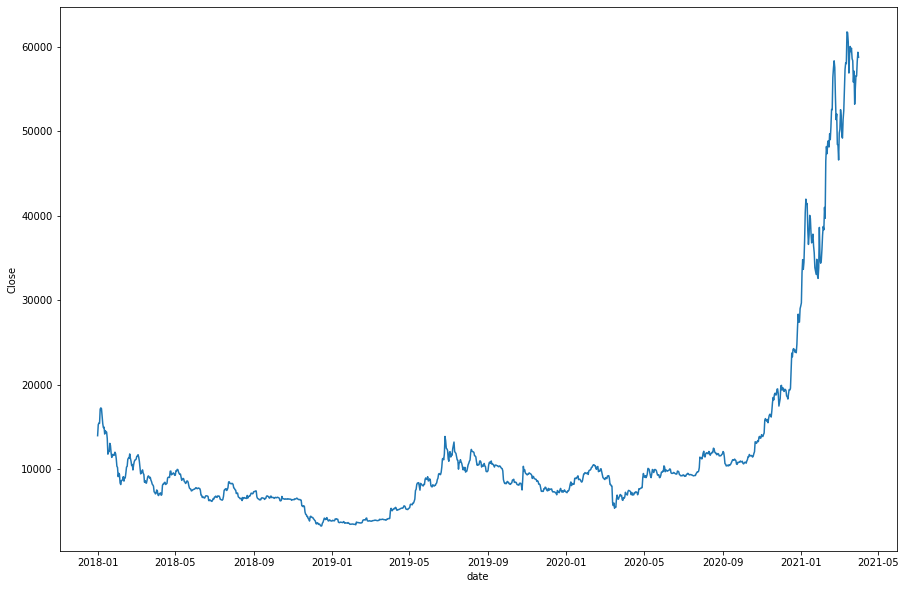

In [244]:
#Gráfico do preço no internvalo delimitado. 
#Ficou faltando colocar o voume junto.
fig, ax1 = plt.subplots(figsize=(15,10))
sns.lineplot(data= dfResumido , x="date", y="Close",ax=ax1)
plt.show()

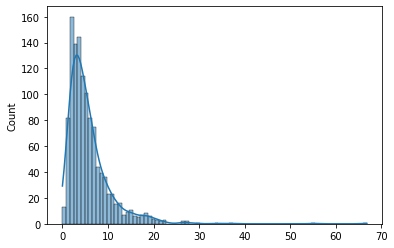

In [245]:
#variação percentual 
sns.histplot( x = ((dfResumido['Close'] - dfResumido['Open'])/ dfResumido['Open'])*100, kde=True);

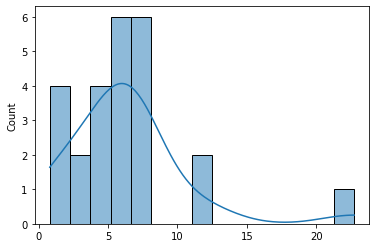

In [246]:
#histograma da variação percectual no dias do tweet do elon musk
sns.histplot( x = ((dfInter['Close'] - dfInter['Open'])/ dfInter['Open'])*100,  kde=True);

Aparenta o mesmo comprotamento, logo ele não teria influência sobre o mercado de bitcoin.

In [247]:
crypots = ((dfInter['Close'] - dfInter['Open'])/ dfInter['Open'])*100
crypots.values 


array([ 7.39628821, 12.36959578,  6.33044081,  2.84225466,  6.36513794,
        0.79879444,  2.65875065, 22.74127012,  1.44937301,  4.81371156,
        6.75443096,  1.82770942,  5.09448742,  7.47090019,  1.37425048,
        6.34024092,  5.0038802 ,  6.76774885,  6.04638391,  6.96525804,
        8.05835501, 11.11686767,  6.13316855,  6.59953347,  5.1571823 ])

In [248]:
mediaPop = (((dfResumido['Close'] - dfResumido['Open'])/ dfResumido['Open'])*100).mean()
mediaPop

5.769817666730019

In [249]:
mediaAmostragem = sum(crypots.values)/len(crypots.values)
mediaAmostragem

6.339040581777649

In [250]:
#Teste t 

#H0
#: a média da amostra é igual à média da referência (ou população).
#H1
#: a média da amostra é diferente à média da referência (ou população).

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp
#http://www.cpaqv.org/estatistica/tabelas_cpaqv.pdf
from scipy import stats

#grau de Liberdade
result = stats.ttest_1samp(crypots.values,mediaPop)
result.pvalue, result.statistic


(0.5248955644802022, 0.6452354508436751)

In [251]:
#Hipotese nula não pode ser rejeitada
result.pvalue < 0.05


False

### Análise dos tweets usando análise de sentimento VADER

In [256]:
sentimental = [sentiment_scores(i) for i in dfBit['tweet']]
dfSentimento = dfBit.copy()
dfSentimento["Sentimento"] = sentimental
dfInter["variacao"] = ((dfInter['Close'] - dfInter['Open'])*100/ dfInter['Open']).values
dfSentimento["variacao"] = [dfInter.loc[dfInter["date"]==i,"variacao"].values[0] for i in dfSentimento['date']]
dfSentimento

,date,tweet,nlikes,nreplies,nretweets,Sentimento,variacao
68,2021-03-12,BTC (Bitcoin) is an anagram of TBC(The Boring ...,244893,12079,17945,Negative,5.157182
148,2021-03-02,Scammers &amp; crypto should get a room,200272,9585,17037,Neutral,6.599533
217,2021-02-20,Cryptocurrency explained https://t.co/kUXaXx8a1R,154807,11112,24313,Neutral,6.133169
219,2021-02-20,Heard a rumor some crypto coin was pegging the...,278356,17594,21597,Positive,6.133169
226,2021-02-20,@PeterSchiff An email saying you have gold is ...,86076,2926,10548,Negative,6.133169
233,2021-02-19,"@realfuckingnews @business Somehow, a hash tex...",8905,993,1101,Positive,11.116868
234,2021-02-19,"@business To be clear, I am *not* an investor,...",35544,2210,6396,Negative,11.116868
235,2021-02-19,@business Tesla’s action is not directly refle...,27882,1001,3521,Negative,11.116868
282,2021-02-10,@freewalletorg Any crypto wallet that won’t gi...,29352,2083,4777,Negative,8.058355
291,2021-02-09,@CryptoShrikar @CoinDesk @Tesla @Dan_Z_Palmer 🤣🤣,3341,260,177,Positive,6.965258


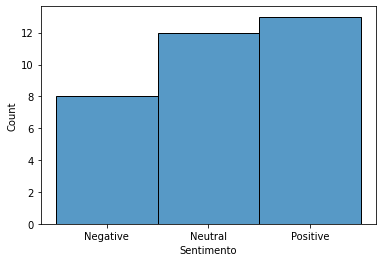

In [257]:
sns.histplot( x =dfSentimento["Sentimento"]);

In [268]:
#Media das variações para tipo de sentimento
{"Media "+i:dfSentimento.loc[dfSentimento['Sentimento']==i,"variacao"].mean() for i in dfSentimento['Sentimento'].unique()}



{'Media Negative': 7.061877798559752,
 'Media Neutral': 5.415357428940664,
 'Media Positive': 7.370805708938777}

### Análise para DogeCoin


In [269]:
#tratar as coisas da dogecoin como fiz com elon musk
#https://www.kaggle.com/dhruvildave/dogecoin-historical-data
doge = pd.read_csv('C:/Banjos/DataSets/DOGE-USD.csv')
doge


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1.463600e+06
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2.215910e+06
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,8.835630e+05
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,9.930040e+05
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,5.391400e+05
...,...,...,...,...,...,...,...
2539,2021-08-30,0.281233,0.289559,0.270375,0.272125,0.272125,1.748987e+09
2540,2021-08-31,0.271878,0.285819,0.270047,0.278453,0.278453,1.745967e+09
2541,2021-09-01,0.278062,0.294889,0.273526,0.294401,0.294401,1.937810e+09
2542,2021-09-02,0.294393,0.309227,0.292010,0.295955,0.295955,2.981069e+09


In [270]:
doge.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [272]:
doge = doge.dropna(how="all",subset=doge.columns[1:])
doge

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,0.000293,0.000299,0.000260,0.000268,0.000268,1.463600e+06
1,2014-09-18,0.000268,0.000325,0.000267,0.000298,0.000298,2.215910e+06
2,2014-09-19,0.000298,0.000307,0.000275,0.000277,0.000277,8.835630e+05
3,2014-09-20,0.000276,0.000310,0.000267,0.000292,0.000292,9.930040e+05
4,2014-09-21,0.000293,0.000299,0.000284,0.000288,0.000288,5.391400e+05
...,...,...,...,...,...,...,...
2539,2021-08-30,0.281233,0.289559,0.270375,0.272125,0.272125,1.748987e+09
2540,2021-08-31,0.271878,0.285819,0.270047,0.278453,0.278453,1.745967e+09
2541,2021-09-01,0.278062,0.294889,0.273526,0.294401,0.294401,1.937810e+09
2542,2021-09-02,0.294393,0.309227,0.292010,0.295955,0.295955,2.981069e+09


In [273]:
#olhando apenas em 2021
dataIni='2021-1-1'
#data final
dataFim='2021-10-1'



In [300]:
dfResumido = doge.copy()

dfResumido = dfResumido.rename(columns={"Date": "date"})

dfResumido["date"]  = pd.to_datetime(dfResumido['date'])
dfResumido = dfResumido.loc[(dfResumido['date'] >=dataIni)& (dfResumido['date'] <=dataFim) ] 
dfResumido["date"]  = pd.to_datetime(dfResumido['date'])

dfResumido

,date,Open,High,Low,Close,Adj Close,Volume
2298,2021-01-01,0.004681,0.005685,0.004615,0.005685,0.005685,2.289615e+08
2299,2021-01-02,0.005686,0.013698,0.005584,0.010615,0.010615,3.421563e+09
2300,2021-01-03,0.010602,0.013867,0.009409,0.009771,0.009771,2.707004e+09
2301,2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1.372399e+09
2302,2021-01-05,0.009767,0.010219,0.008972,0.009920,0.009920,6.872561e+08
...,...,...,...,...,...,...,...
2539,2021-08-30,0.281233,0.289559,0.270375,0.272125,0.272125,1.748987e+09
2540,2021-08-31,0.271878,0.285819,0.270047,0.278453,0.278453,1.745967e+09
2541,2021-09-01,0.278062,0.294889,0.273526,0.294401,0.294401,1.937810e+09
2542,2021-09-02,0.294393,0.309227,0.292010,0.295955,0.295955,2.981069e+09


In [301]:
#linhas em que são citados o dogecoin
dogeDf = dfElos[dfElos["tweet"].str.contains("dogecoin|doge coin|Dogecoin|Doge coin|doge|Doge|Crypto|Cryptocurrency " , na=False)]

dogeDf


,date,tweet,nlikes,nreplies,nretweets
32,2021-03-18,@lexfridman Sometimes it’s about Doge,49367,1713,3611
40,2021-03-15,@beeple 420M Doge,81016,2596,5267
57,2021-03-13,"Why are you so dogematic, they ask",246136,9613,19539
58,2021-03-13,Origin of Doge Day Afternoon: The ancient Roma...,74912,2428,7768
59,2021-03-13,Doge day afternoon,174955,7352,18939
108,2021-03-06,Doge spelled backwards is Egod,410090,21122,38640
143,2021-03-02,@WootiezTV Very much so &amp; its leader shall...,16349,763,1697
149,2021-03-02,@draecomino 2022: Dogecoin is dumb,14453,834,1984
155,2021-03-01,Doge meme shield (legendary item) https://t.c...,283402,9559,26818
212,2021-02-21,Dojo 4 Doge,329977,20203,33574


In [302]:
dogeDf.shape

(40, 5)

In [303]:
dogeDf['date'].nunique()

26

In [332]:
#vê o preço no dia anterior e posterior aos tweets
dfInter = dfResumido.loc[np.isin(dfResumido['date'].dt.date,pd.Series(list(set(dfResumido['date'].dt.date).intersection(set(dogeDf['date'])))).values) ]

#base com o resultado do final do dia
dfInter

,date,Open,High,Low,Close,Adj Close,Volume
2332,2021-02-04,0.037226,0.057869,0.035945,0.053289,0.053289,1.304084e+10
2334,2021-02-06,0.046931,0.058308,0.044904,0.057595,0.057595,5.946101e+09
2335,2021-02-07,0.057502,0.084357,0.054239,0.078782,0.078782,1.426102e+10
2336,2021-02-08,0.078352,0.084945,0.064702,0.078825,0.078825,1.284438e+10
2337,2021-02-09,0.078773,0.083128,0.065621,0.070070,0.070070,7.348841e+09
2338,2021-02-10,0.070111,0.081091,0.068525,0.072896,0.072896,6.785088e+09
2339,2021-02-11,0.072844,0.074301,0.068290,0.069676,0.069676,3.818557e+09
2342,2021-02-14,0.066448,0.066448,0.056723,0.062537,0.062537,3.984668e+09
2348,2021-02-20,0.055132,0.060286,0.051628,0.054384,0.054384,3.175469e+09
2349,2021-02-21,0.054369,0.058428,0.053556,0.055980,0.055980,2.450293e+09


In [333]:
dfInter.shape

(16, 7)

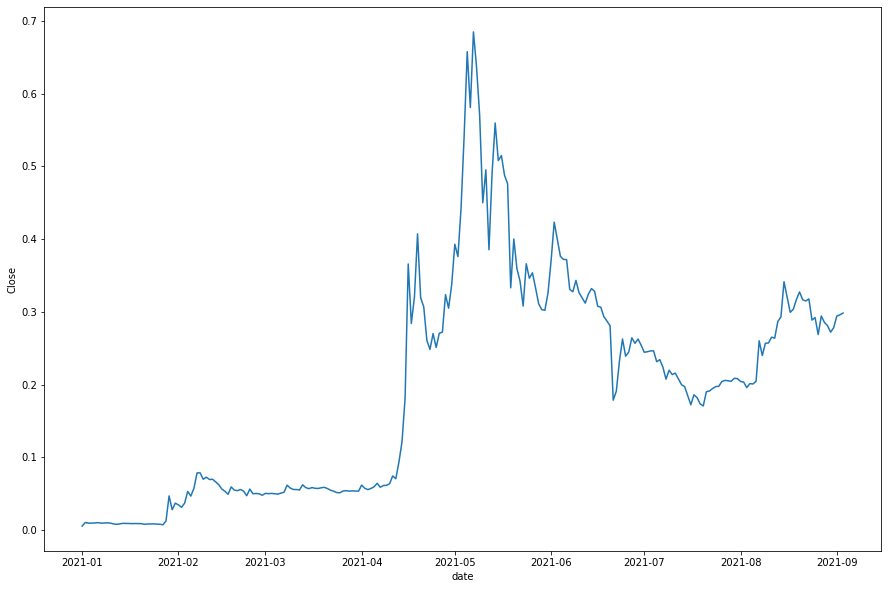

In [307]:
fig, ax1 = plt.subplots(figsize=(15,10))
sns.lineplot(data= dfResumido , x="date", y="Close",ax=ax1)
plt.show()

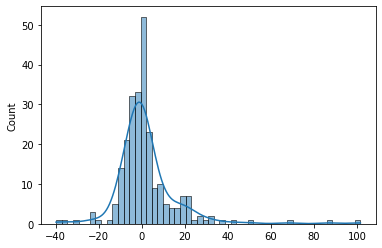

In [308]:
#variação percentual 
sns.histplot( x = ((dfResumido['Close'] - dfResumido['Open'])/ dfResumido['Open'])*100, kde=True);

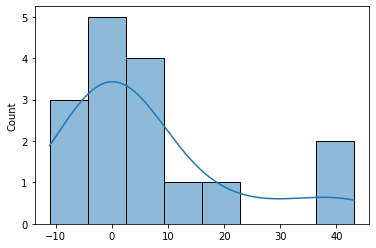

In [309]:
#histograma da variação percectual no dias do tweet do elon musk
sns.histplot( x = ((dfInter['Close'] - dfInter['Open'])/ dfInter['Open'])*100,  kde=True);

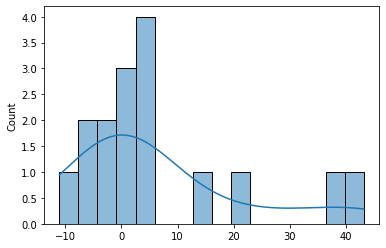

In [310]:
#olhando todos os ponto separadamente
sns.histplot( x = ((dfInter['Close'] - dfInter['Open'])/ dfInter['Open'])*100,  kde=True, bins=dfInter.shape[0] );

In [311]:
crypots = ((dfInter['Close'] - dfInter['Open'])/ dfInter['Open'])*100

mediaAmostragem = sum(crypots.values)/len(crypots.values)
#Teste t 

#H0
#: a média da amostra é igual à média da referência (ou população).
#H1
#: a média da amostra é diferente à média da referência (ou população).

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp
#http://www.cpaqv.org/estatistica/tabelas_cpaqv.pdf

#grau de Liberdade
result = stats.ttest_1samp(crypots.values,mediaPop)
result.pvalue < 0.05




False

### Análise dos tweets usando análise de sentimento VADER

In [338]:
sentimental = [sentiment_scores(i) for i in dogeDf['tweet']]
dfSentimento = dogeDf.copy()
dfSentimento["Sentimento"] = sentimental
dfSentimento =dfSentimento.loc[(dfSentimento['date'] >=pd.to_datetime(dataIni))& (dfSentimento['date'] <=pd.to_datetime(dataFim)) ] 
dfSentimento['date']  = pd.to_datetime( dfSentimento['date'])
dfInter["variacao"] = ((dfInter['Close'] - dfInter['Open'])*100/ dfInter['Open']).values
dfSentimento["variacao"] = [dfInter.loc[dfInter["date"]==i,"variacao"].values[0] for i in dfSentimento['date']]
dfSentimento

,date,tweet,nlikes,nreplies,nretweets,Sentimento,variacao
32,2021-03-18,@lexfridman Sometimes it’s about Doge,49367,1713,3611,Neutral,-0.445871
40,2021-03-15,@beeple 420M Doge,81016,2596,5267,Neutral,-2.465360
57,2021-03-13,"Why are you so dogematic, they ask",246136,9613,19539,Neutral,12.788828
58,2021-03-13,Origin of Doge Day Afternoon: The ancient Roma...,74912,2428,7768,Negative,12.788828
59,2021-03-13,Doge day afternoon,174955,7352,18939,Neutral,12.788828
108,2021-03-06,Doge spelled backwards is Egod,410090,21122,38640,Neutral,2.788250
143,2021-03-02,@WootiezTV Very much so &amp; its leader shall...,16349,763,1697,Neutral,-0.660131
149,2021-03-02,@draecomino 2022: Dogecoin is dumb,14453,834,1984,Negative,-0.660131
155,2021-03-01,Doge meme shield (legendary item) https://t.c...,283402,9559,26818,Neutral,5.261078
212,2021-02-21,Dojo 4 Doge,329977,20203,33574,Neutral,2.963086


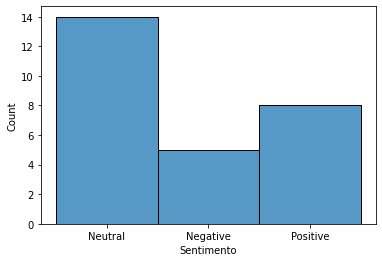

In [339]:
sns.histplot( x =dfSentimento["Sentimento"]);

In [340]:
#Media das variações para tipo de sentimento
{"Media "+i:dfSentimento.loc[dfSentimento['Sentimento']==i,"variacao"].mean() for i in dfSentimento['Sentimento'].unique()}


{'Media Neutral': 12.976018773291596,
 'Media Negative': 0.8068686230511396,
 'Media Positive': 11.453933190990028}